In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split

import warnings
def warn(*args,**kwargs):
  pass
warnings.warn = warn

## Objetivo

Evaluar las capacidades del estudiante para construir modelos de Machine Learning supervisado contemplando las etapas de la metodología ASUM-DM, como son el entendimiento y la preparación de datos, entrenamiento y evaluación de modelos, y análisis de resultados.

## Descripción

La alcaldía de una ciudad está interesada en implementar un nuevo servicio de patinetas para incentivar la movilidad sostenible. Como parte de este proceso, se encuentra evaluando la viabilidad económica e impacto de dicho servicio. Dado lo anterior, le ha encargado a usted la construcción de un modelo que permita predecir la demanda de patinetas al día con base en los datos de una ciudad vecina. Usted debe construir el mejor modelo de regresión que le permita predecir el número de usuarios promedio por día del nuevo servicio, al mismo tiempo de poder entender la importancia y relación de las variables consideradas. A continuación, se relaciona el diccionario de la base de datos de la ciudad vecina:

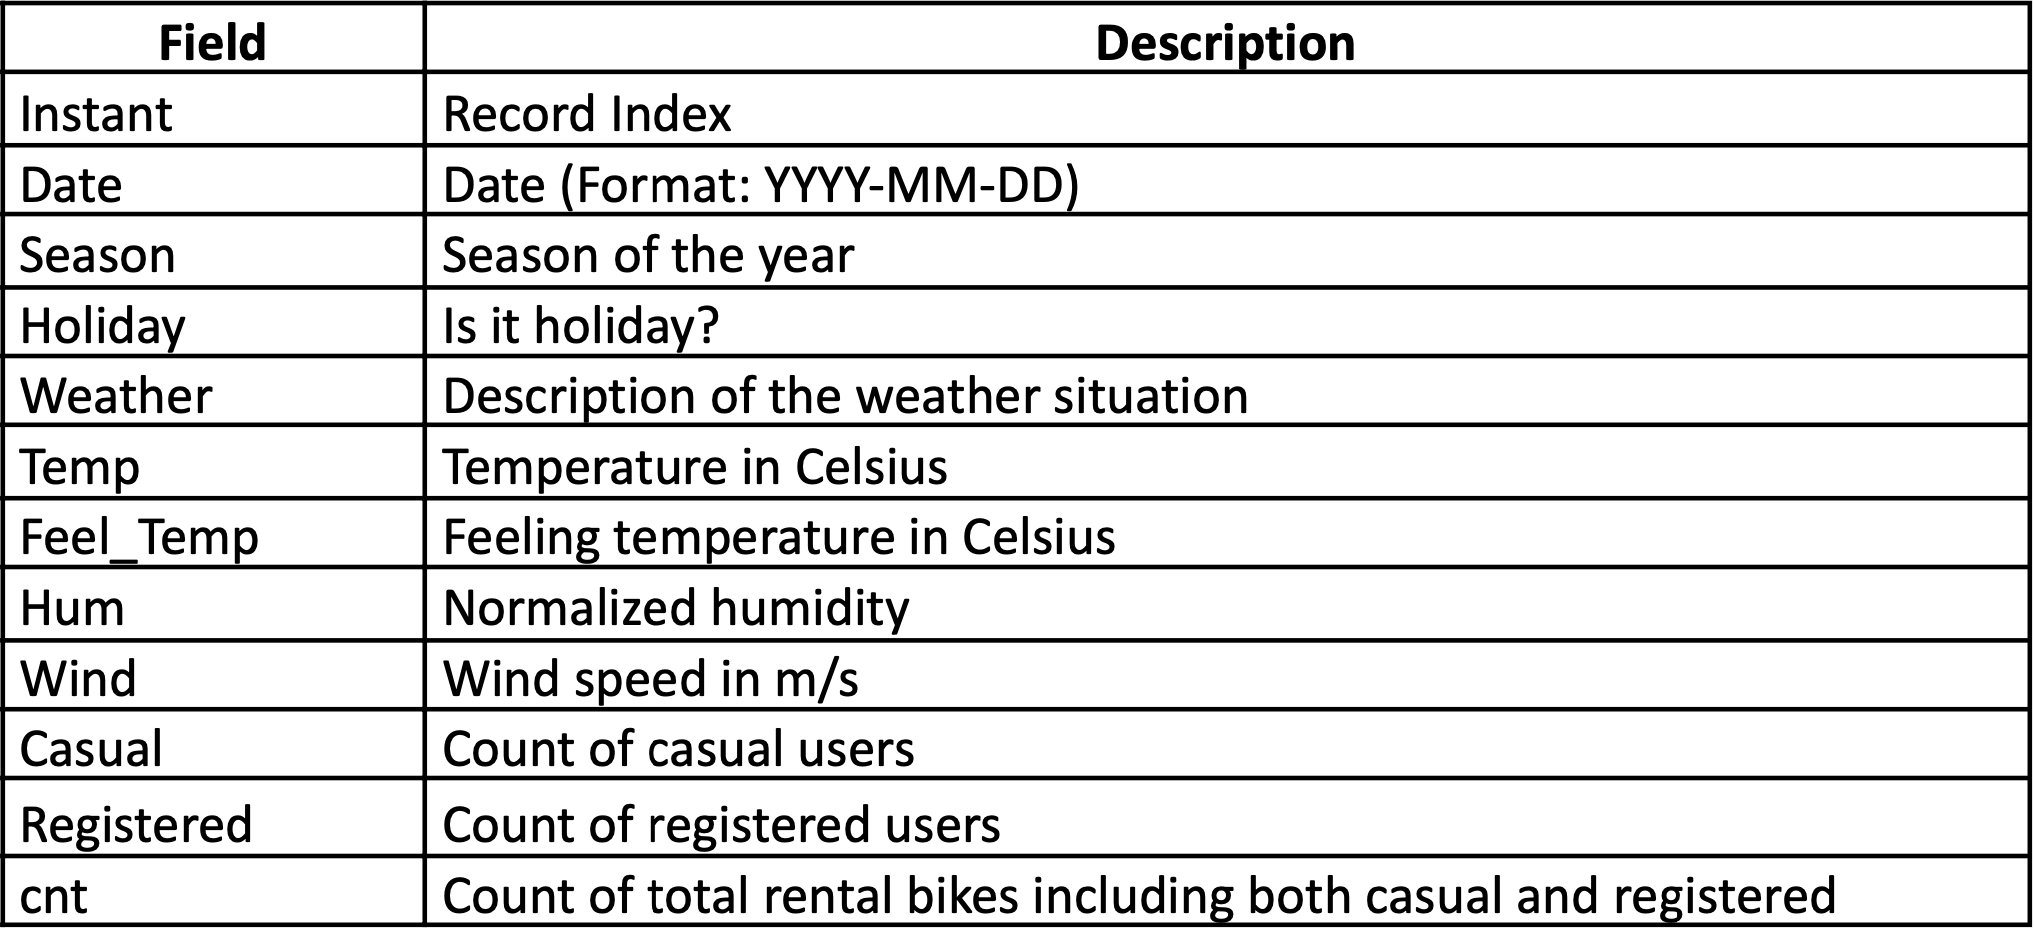

In [2]:
df=pd.read_csv("Data_Taller_2.csv",sep=";")
datos=df.copy()
datos

instant        Date    Season Holiday            Weather      Temp  \
0          1   1/01/2020  Springer      No      Mist + Cloudy  8,175849   
1          2   2/01/2020  Springer      No      Mist + Cloudy  9,083466   
2          3   3/01/2020  Springer      No         Few clouds  1,229108   
3          4   4/01/2020  Springer      No         Few clouds       1,4   
4          5   5/01/2020  Springer      No   Partly    cloudy  2,666979   
..       ...         ...       ...     ...                ...       ...   
726      727  27/12/2021  Springer      No      Mist + Cloudy  3,945849   
727      728  28/12/2021  Springer      No  Mist + Few clouds  3,906651   
728      729  29/12/2021  Springer      No               Mist  3,906651   
729      730  30/12/2021  Springer      No         Few clouds  4,024151   
730      731  31/12/2021  Springer      No  Mist + Few clouds  2,144151   

    Feel_Temp       Hum        Wind  Casual  Registered   cnt  
0    9,090375  0,805833   10,749882     331         654   985  
1    8,625733  0,696087  -16,652113     131         670   801  
2    0,902035  0,437273   16,636703     120        1229  1349  
3    1,969734  0,590435   10,739832     108        1454  1562  
4     2,77569  0,436957     12,5223      82        1518  1600  
..        ...       ...         ...     ...         ...   ...  
726  2,652174  0,652917   23,458911     247        1867  2114  
727  3,987162      0,59   10,416557     644        2451  3095  
728    3,3928  0,752917    8,333661     159        1182  1341  
729    2,8899  0,483333   23,500518     364        1432  1796  
730  2,503889    0,5775   10,374682     439        2290  2729  

[731 rows x 12 columns]

## Actividades

A continuación, se describen los hitos esperados por la alcaldía:

## Limpieza y preparación de datos (25 pts)

Búsqueda y corrección de valores atípicos, valores faltantes y duplicados. Debido a que la base de datos no es muy grande, deberá abstenerse de eliminar registros. Así mismo, busque la oportunidad de generar nuevas variables con base en la información suministrada.

In [3]:
#¿Cuántos tipos de cada columna de tipos de datos existen?
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     731 non-null    int64 
 1   Date        731 non-null    object
 2   Season      731 non-null    object
 3   Holiday     731 non-null    object
 4   Weather     731 non-null    object
 5   Temp        727 non-null    object
 6   Feel_Temp   731 non-null    object
 7   Hum         731 non-null    object
 8   Wind        731 non-null    object
 9   Casual      731 non-null    int64 
 10  Registered  731 non-null    int64 
 11  cnt         731 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 68.7+ KB


In [4]:
# Aquí podemos evidenciar que no hay registros duplicados en nuestro conjunto de datos.
datos.duplicated(keep=False) 

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

In [5]:
# convertimos variables categoricas que deberían ser númericas
datos['Temp'] =datos['Temp'] .str.replace('[,]','.') 
datos['Feel_Temp'] =datos['Feel_Temp'] .str.replace('[,]','.') 

datos['Temp']=datos['Temp'].astype(float, errors = 'raise')
datos['Feel_Temp']=datos['Feel_Temp'].astype(float, errors = 'raise')

datos['Wind'] =datos['Wind'] .str.replace('[,]','.') 
datos['Wind']=datos['Wind'].astype(float, errors = 'raise')

datos['Hum'] =datos['Hum'] .str.replace('[,]','.') 
datos['Hum']=datos['Hum'].astype(float, errors = 'raise')

In [6]:
#Descripción de las variables númericas
datos.describe()

instant        Temp   Feel_Temp         Hum        Wind  \
count  731.000000  727.000000  731.000000  731.000000  731.000000   
mean   366.000000   15.271063   14.294637    0.682614   12.668792   
std    211.165812    8.595965    7.659175    0.750679    5.417463   
min      1.000000   -5.220871   -4.283729    0.000000  -16.652113   
25%    183.500000    7.842925    7.878597    0.522291    9.000746   
50%    366.000000   15.421651   14.876451    0.629167   12.124789   
75%    548.500000   22.785000   20.604294    0.732708   15.624802   
max    731.000000   32.498349   31.522112   10.867083   34.000021   

            Casual   Registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Validación, cantidad de datos nulos
datos.isnull().sum()


instant       0
Date          0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

In [8]:
# Imputamos la variable Temp con la media
datos['Temp'].fillna(datos['Temp'].mean(), inplace=True)
print("valores perdidos en Temp: " + 
      str(datos['Temp'].isnull().sum()))


valores perdidos en Temp: 0


## Análisis de datos (15 pts)

Analice las variables que conforman la base de datos. Realice análisis univariados y bivariados según considere. No olvide utilizar técnicas de análisis visual.


In [9]:
#Cantidad de registros en las categorías Season,Holiday y Weather
Season=datos['Season'].value_counts()
print(Season)

Holiday=datos['Holiday'].value_counts()
print(Holiday)

Weather=datos['Weather'].value_counts()
print(Weather)

Fall        188
Summer      184
Springer    181
Winter      178
Name: Season, dtype: int64
No     710
Yes     21
Name: Holiday, dtype: int64
 Partly    cloudy                128
Few clouds                       118
Clear                            111
 Partly cloudy                   106
Mist + Broken clouds              69
Mist + Cloudy                     66
Mist + Few clouds                 58
Mist                              54
Light Rain + Scattered clouds      8
Rain + Thunderstorm                7
Snow                               6
Name: Weather, dtype: int64


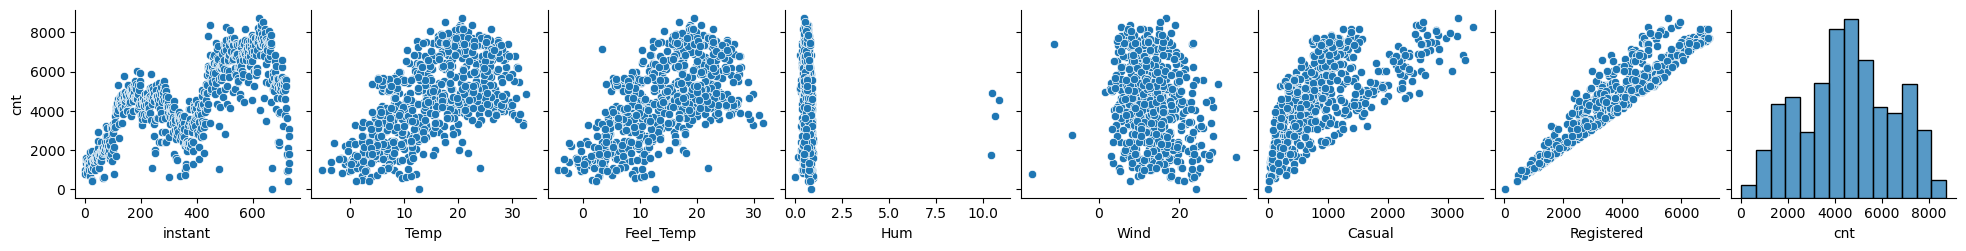

In [10]:
# Verificación de la relación que existe entre la variable respuesta cnt y las demás variables númericas
datos_num = datos.select_dtypes(include = ['float64','int64'])
sns.pairplot(data=datos_num,x_vars=datos_num.columns,y_vars=['cnt'])

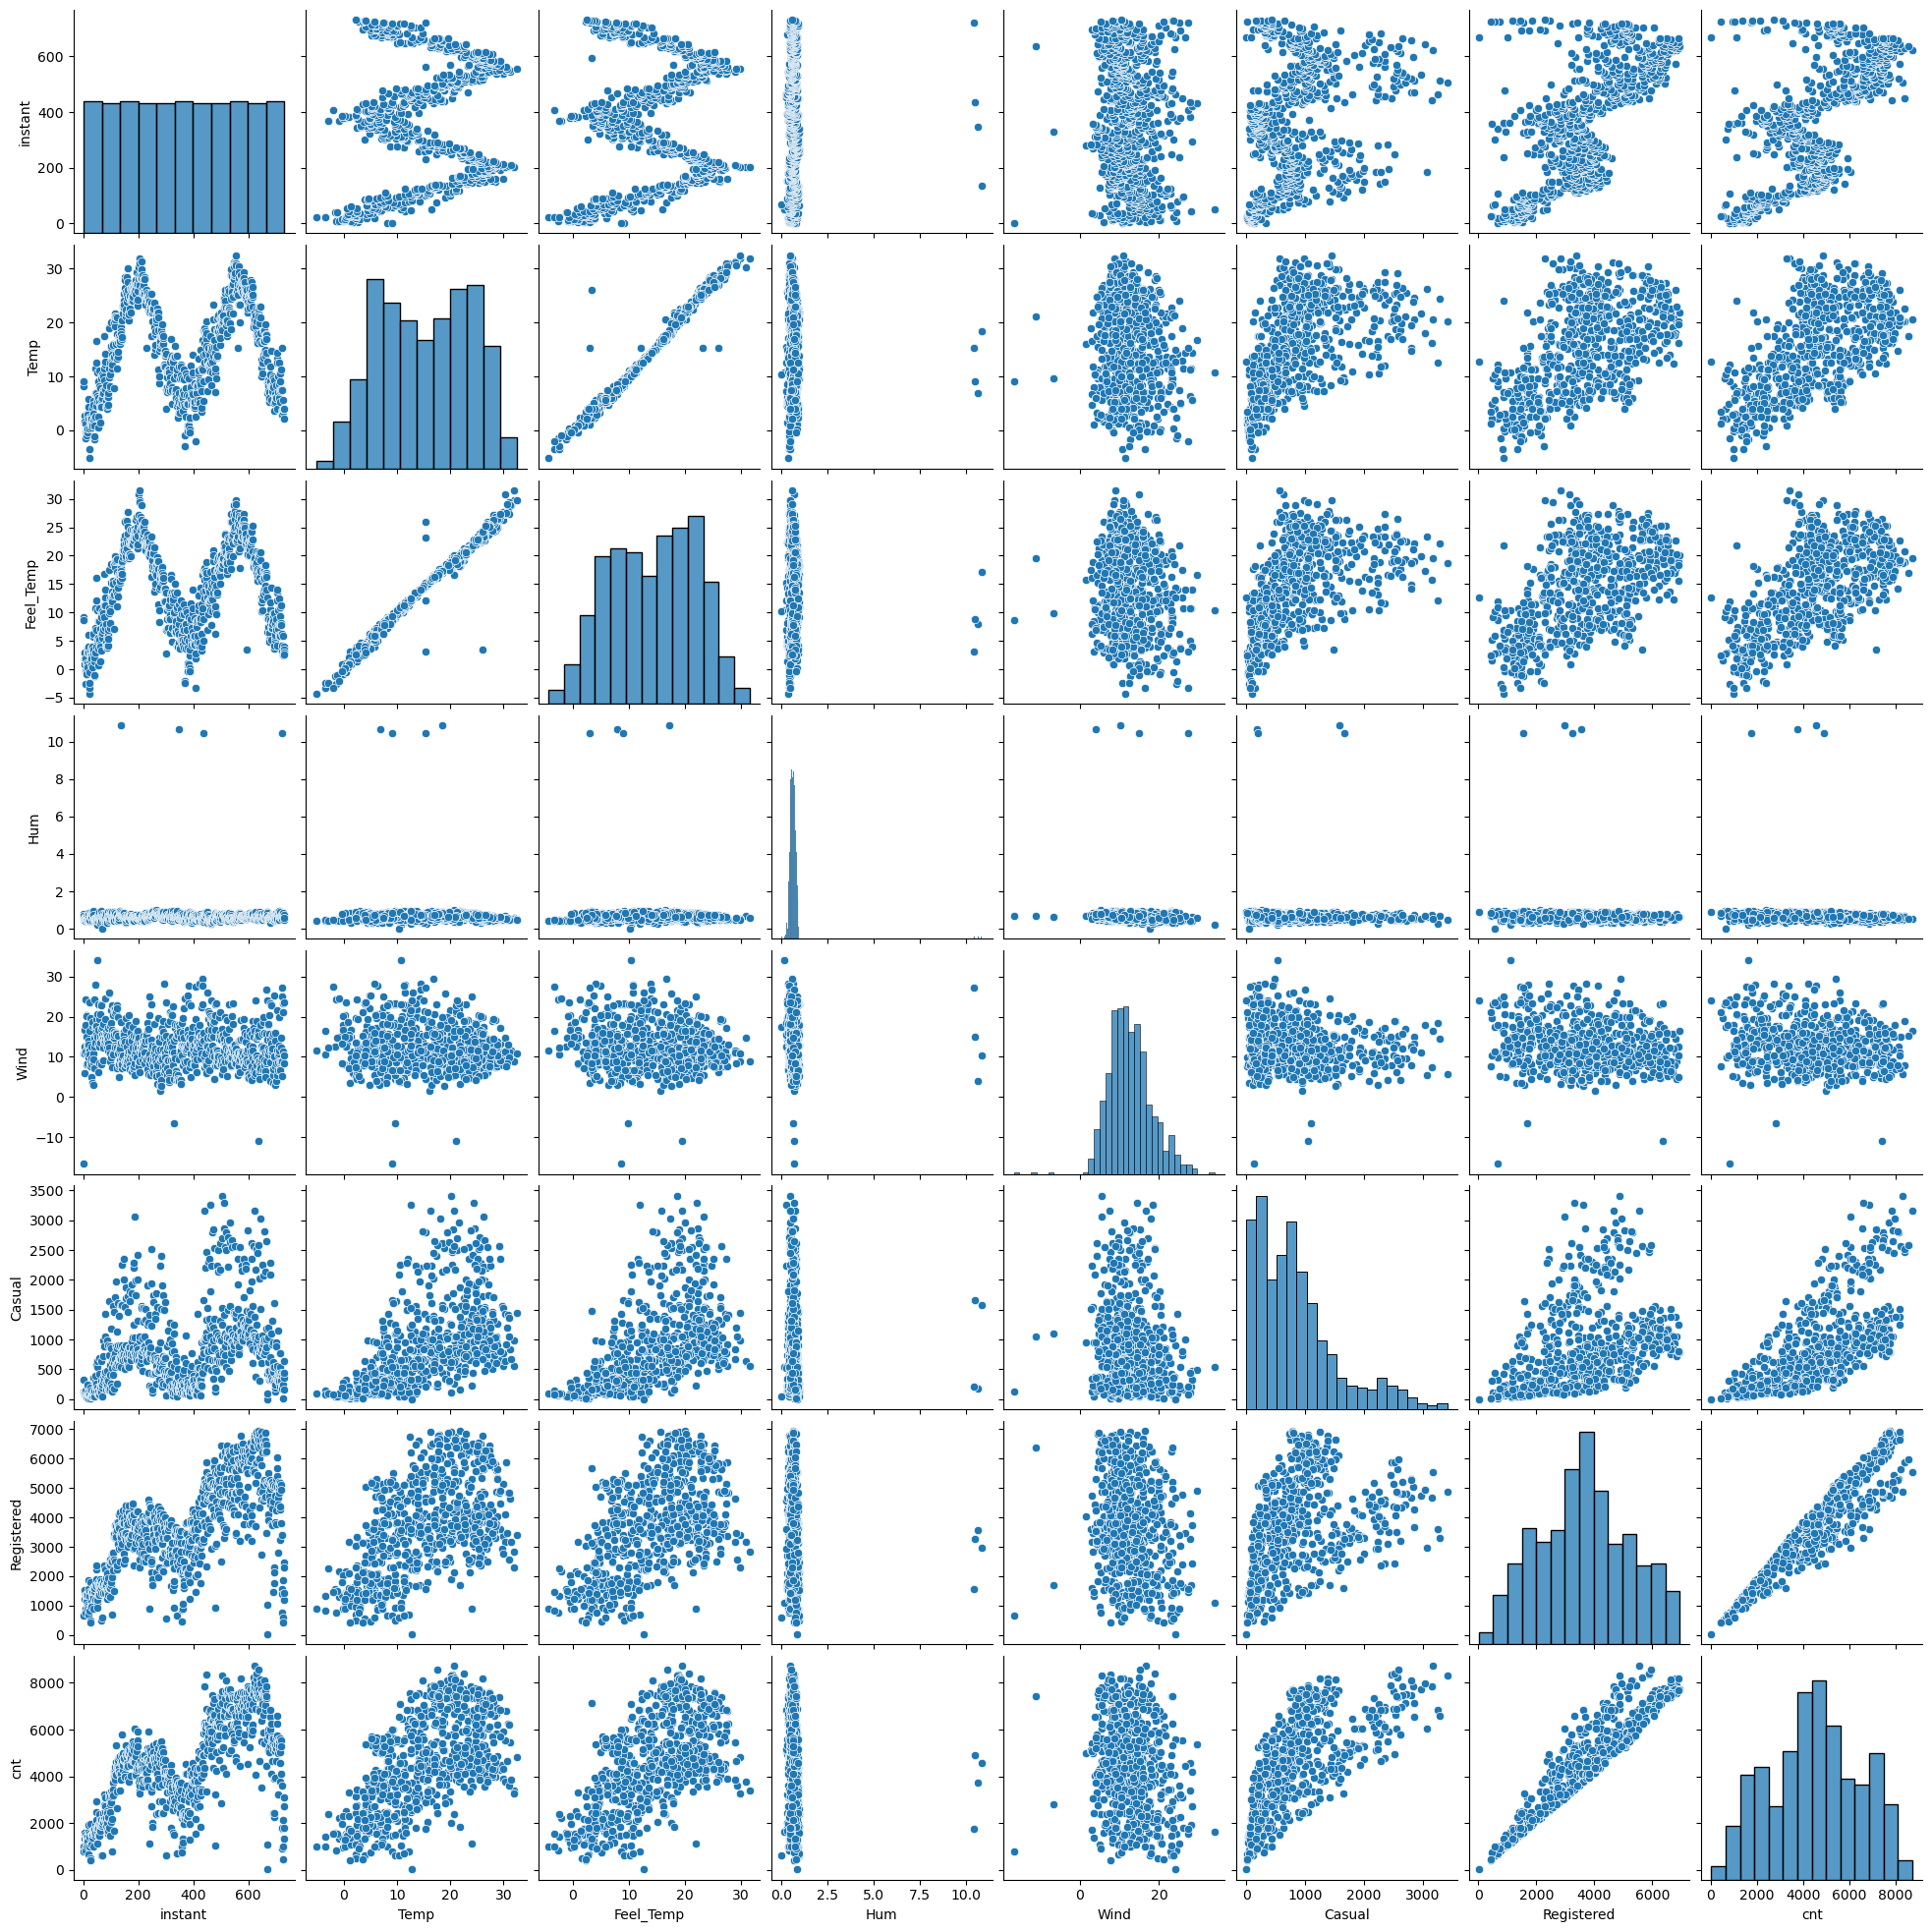

In [11]:
# Relación entre las variables númericas
sns.pairplot(data=datos)
plt.show()

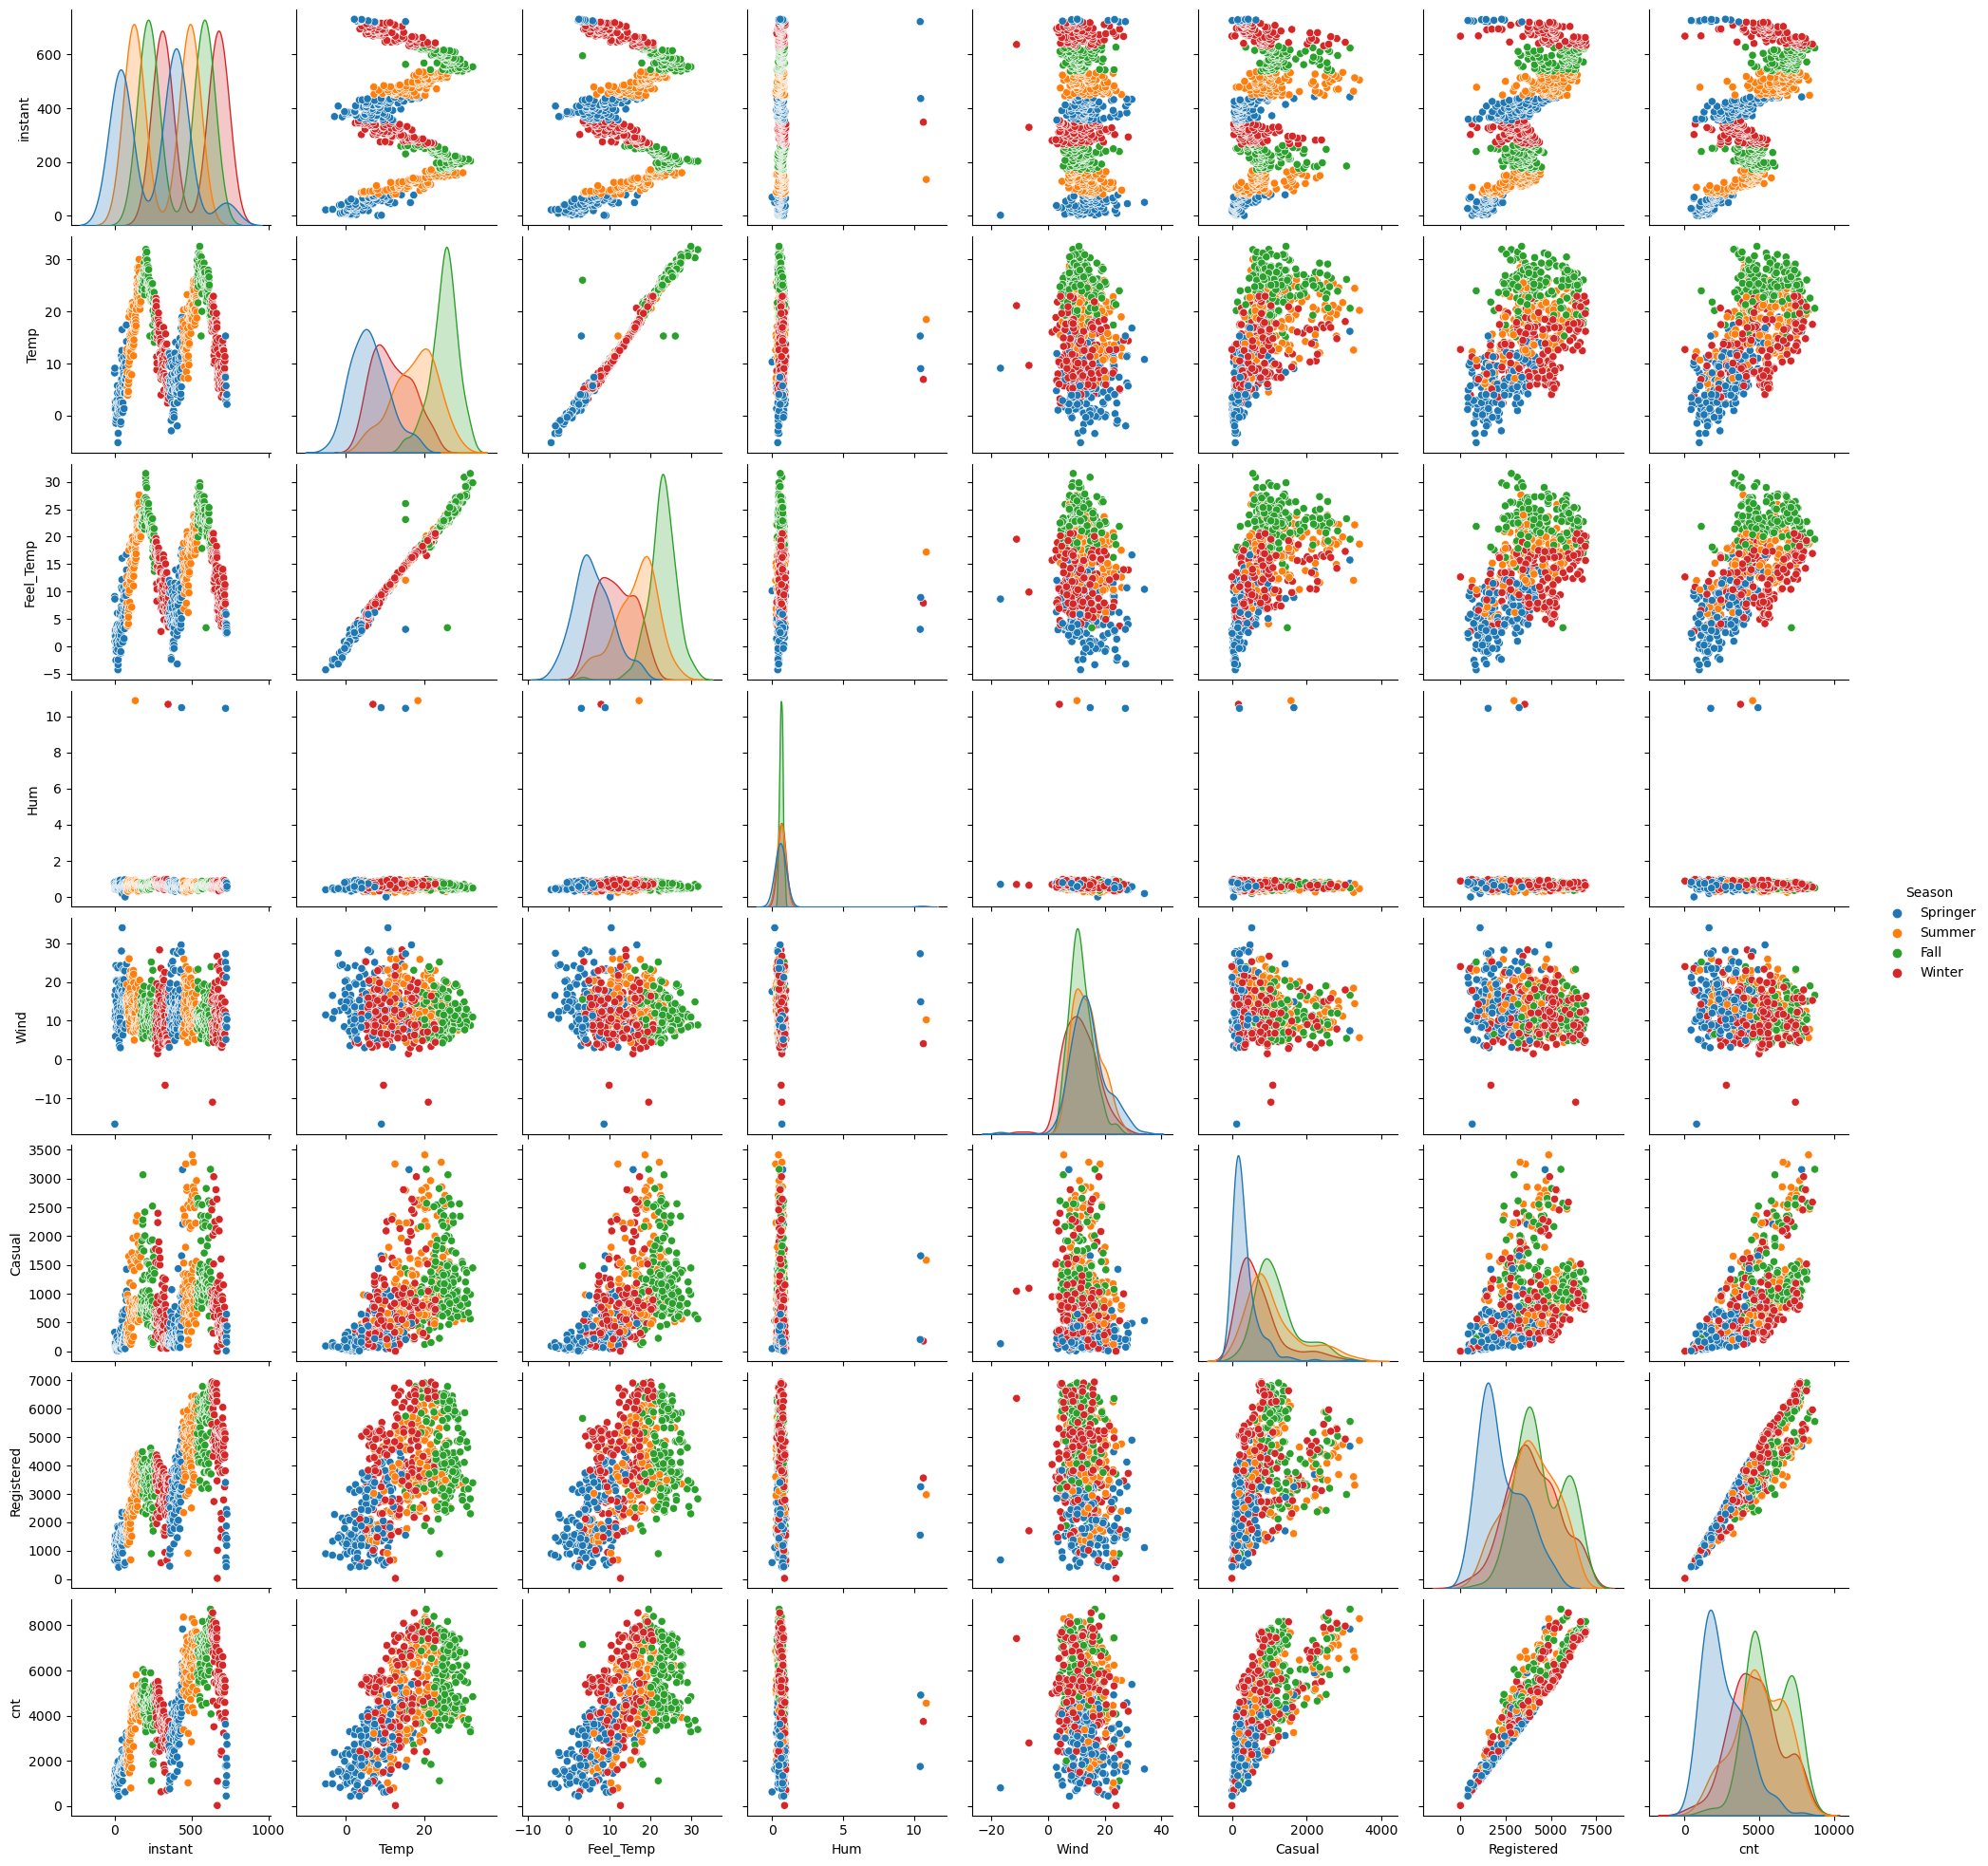

In [12]:
#Relación entre las variables númericas diferenciadas a través de la variable season
sns.pairplot(data = datos,hue='Season')
plt.show()

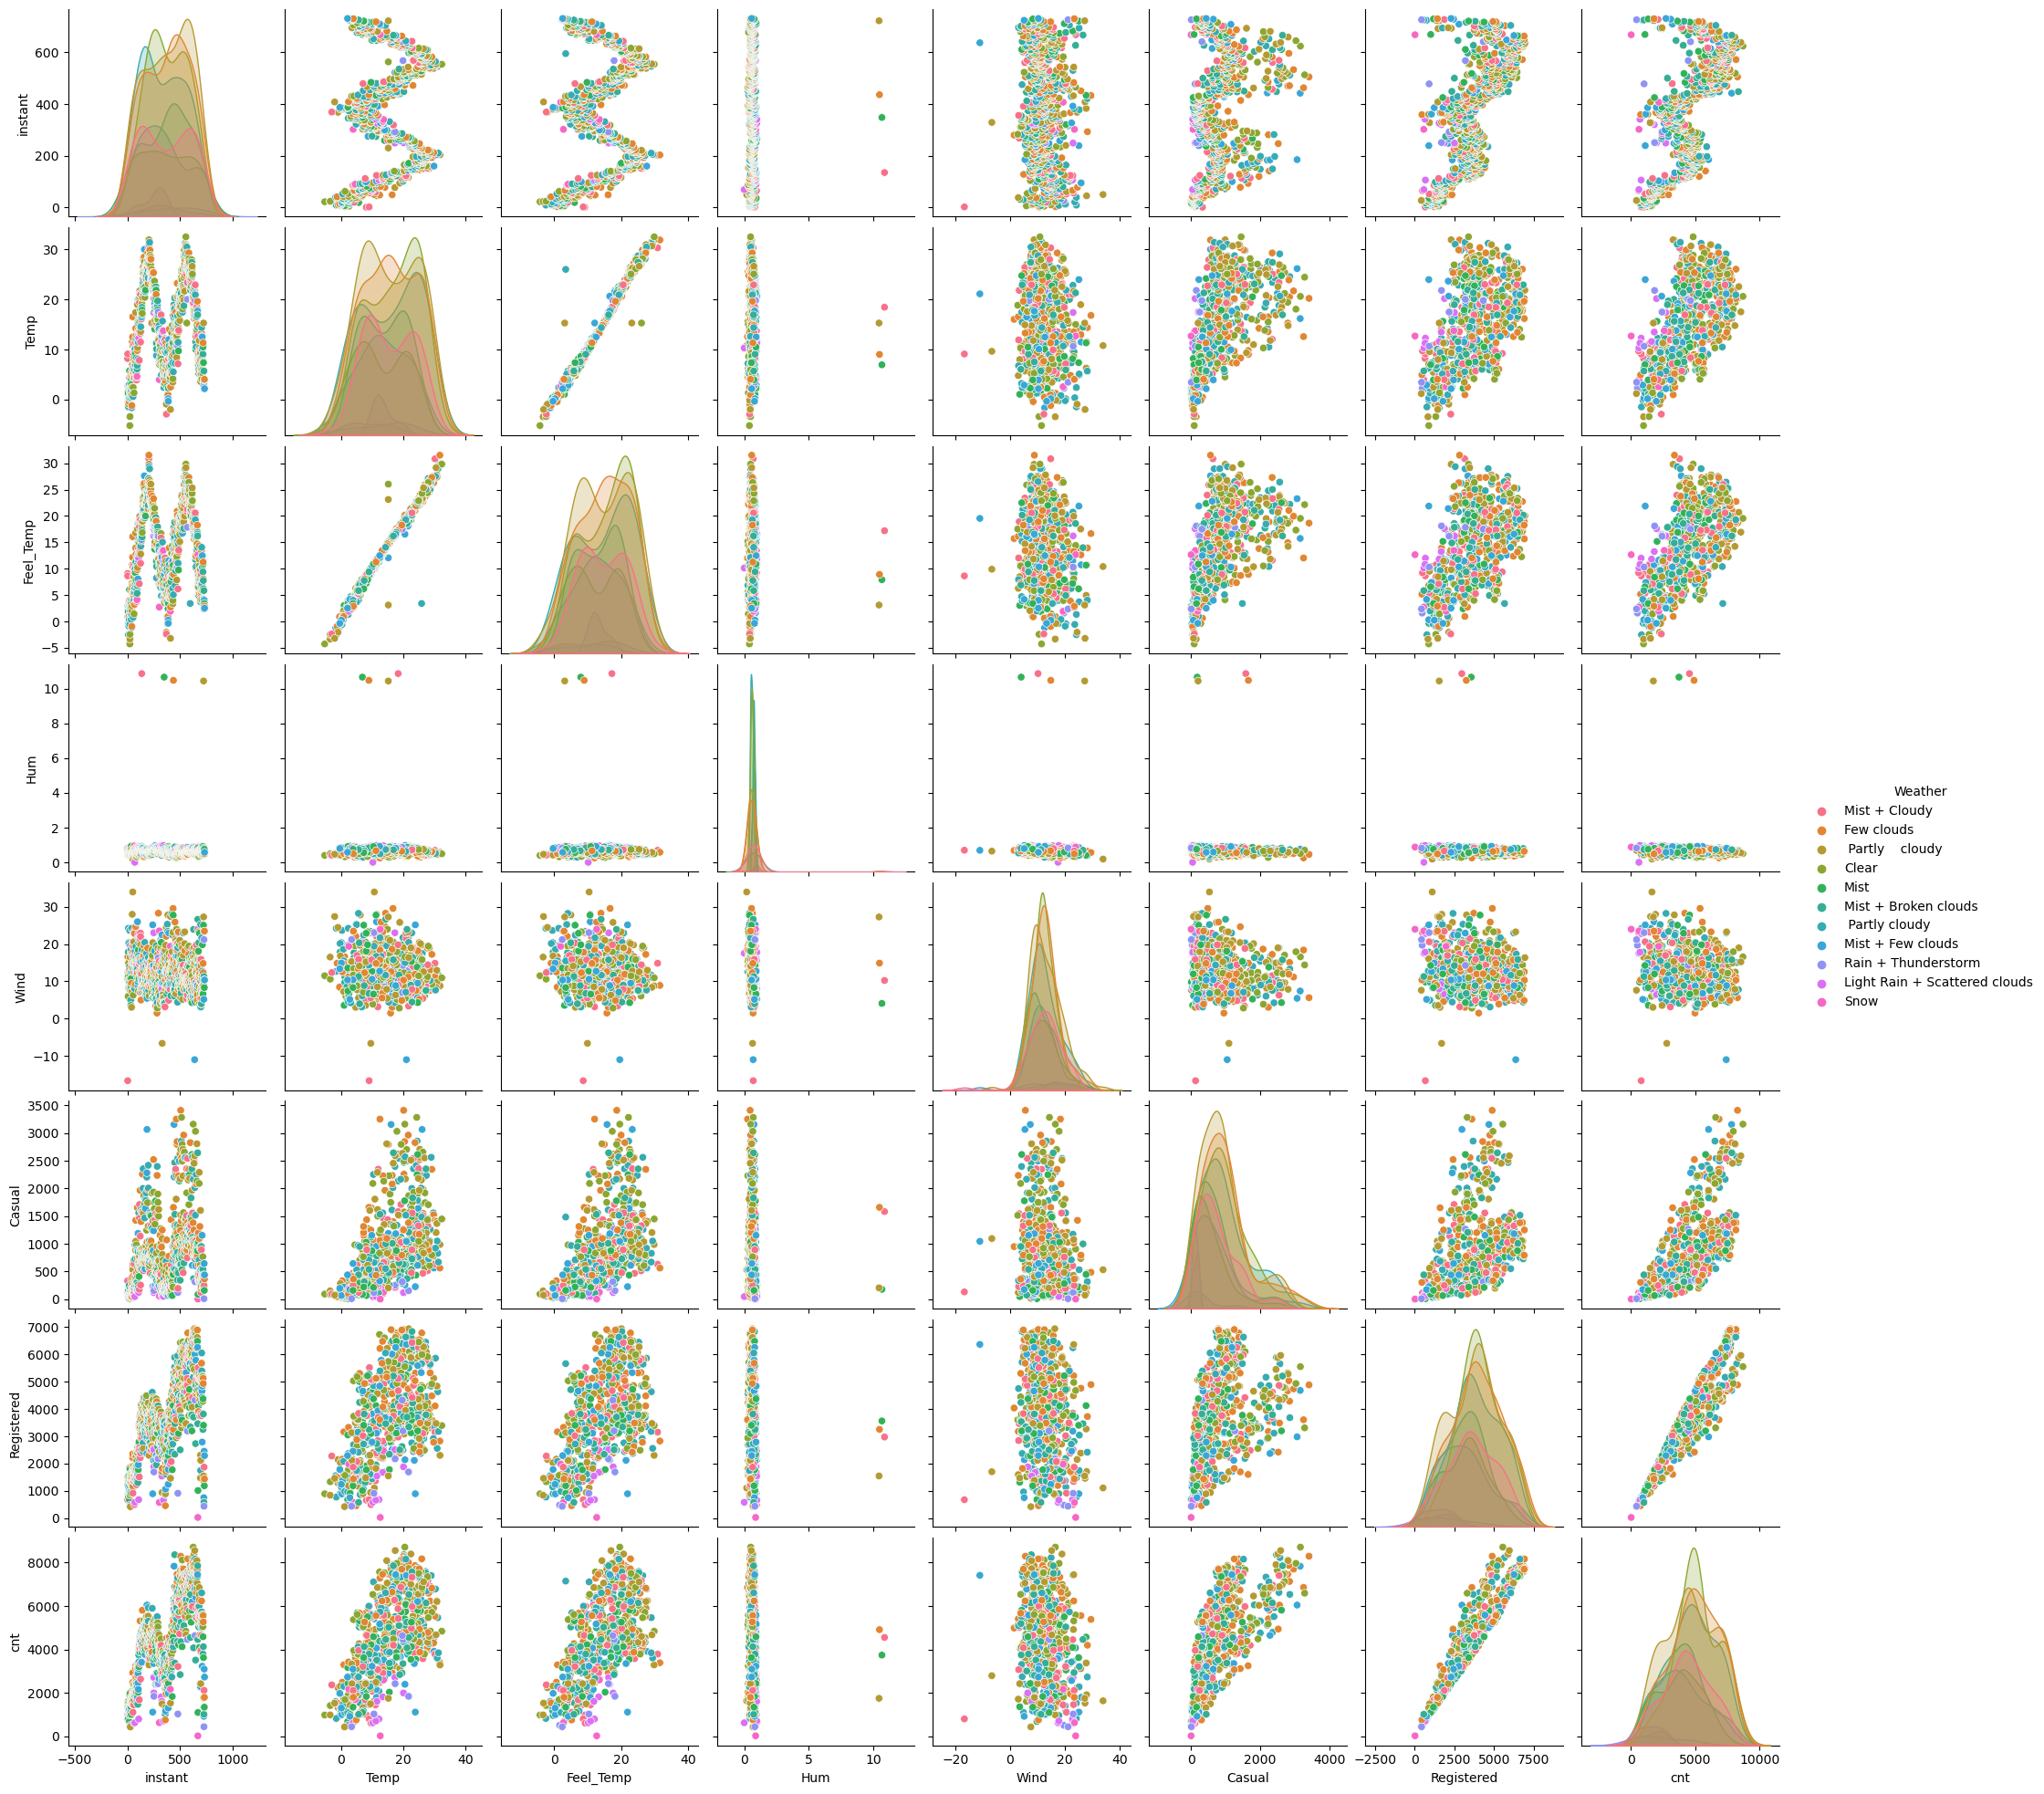

In [13]:
#Relación entre las variables númericas diferenciadas a través de la variable Weather
sns.pairplot(data = datos,hue='Weather')
plt.show()

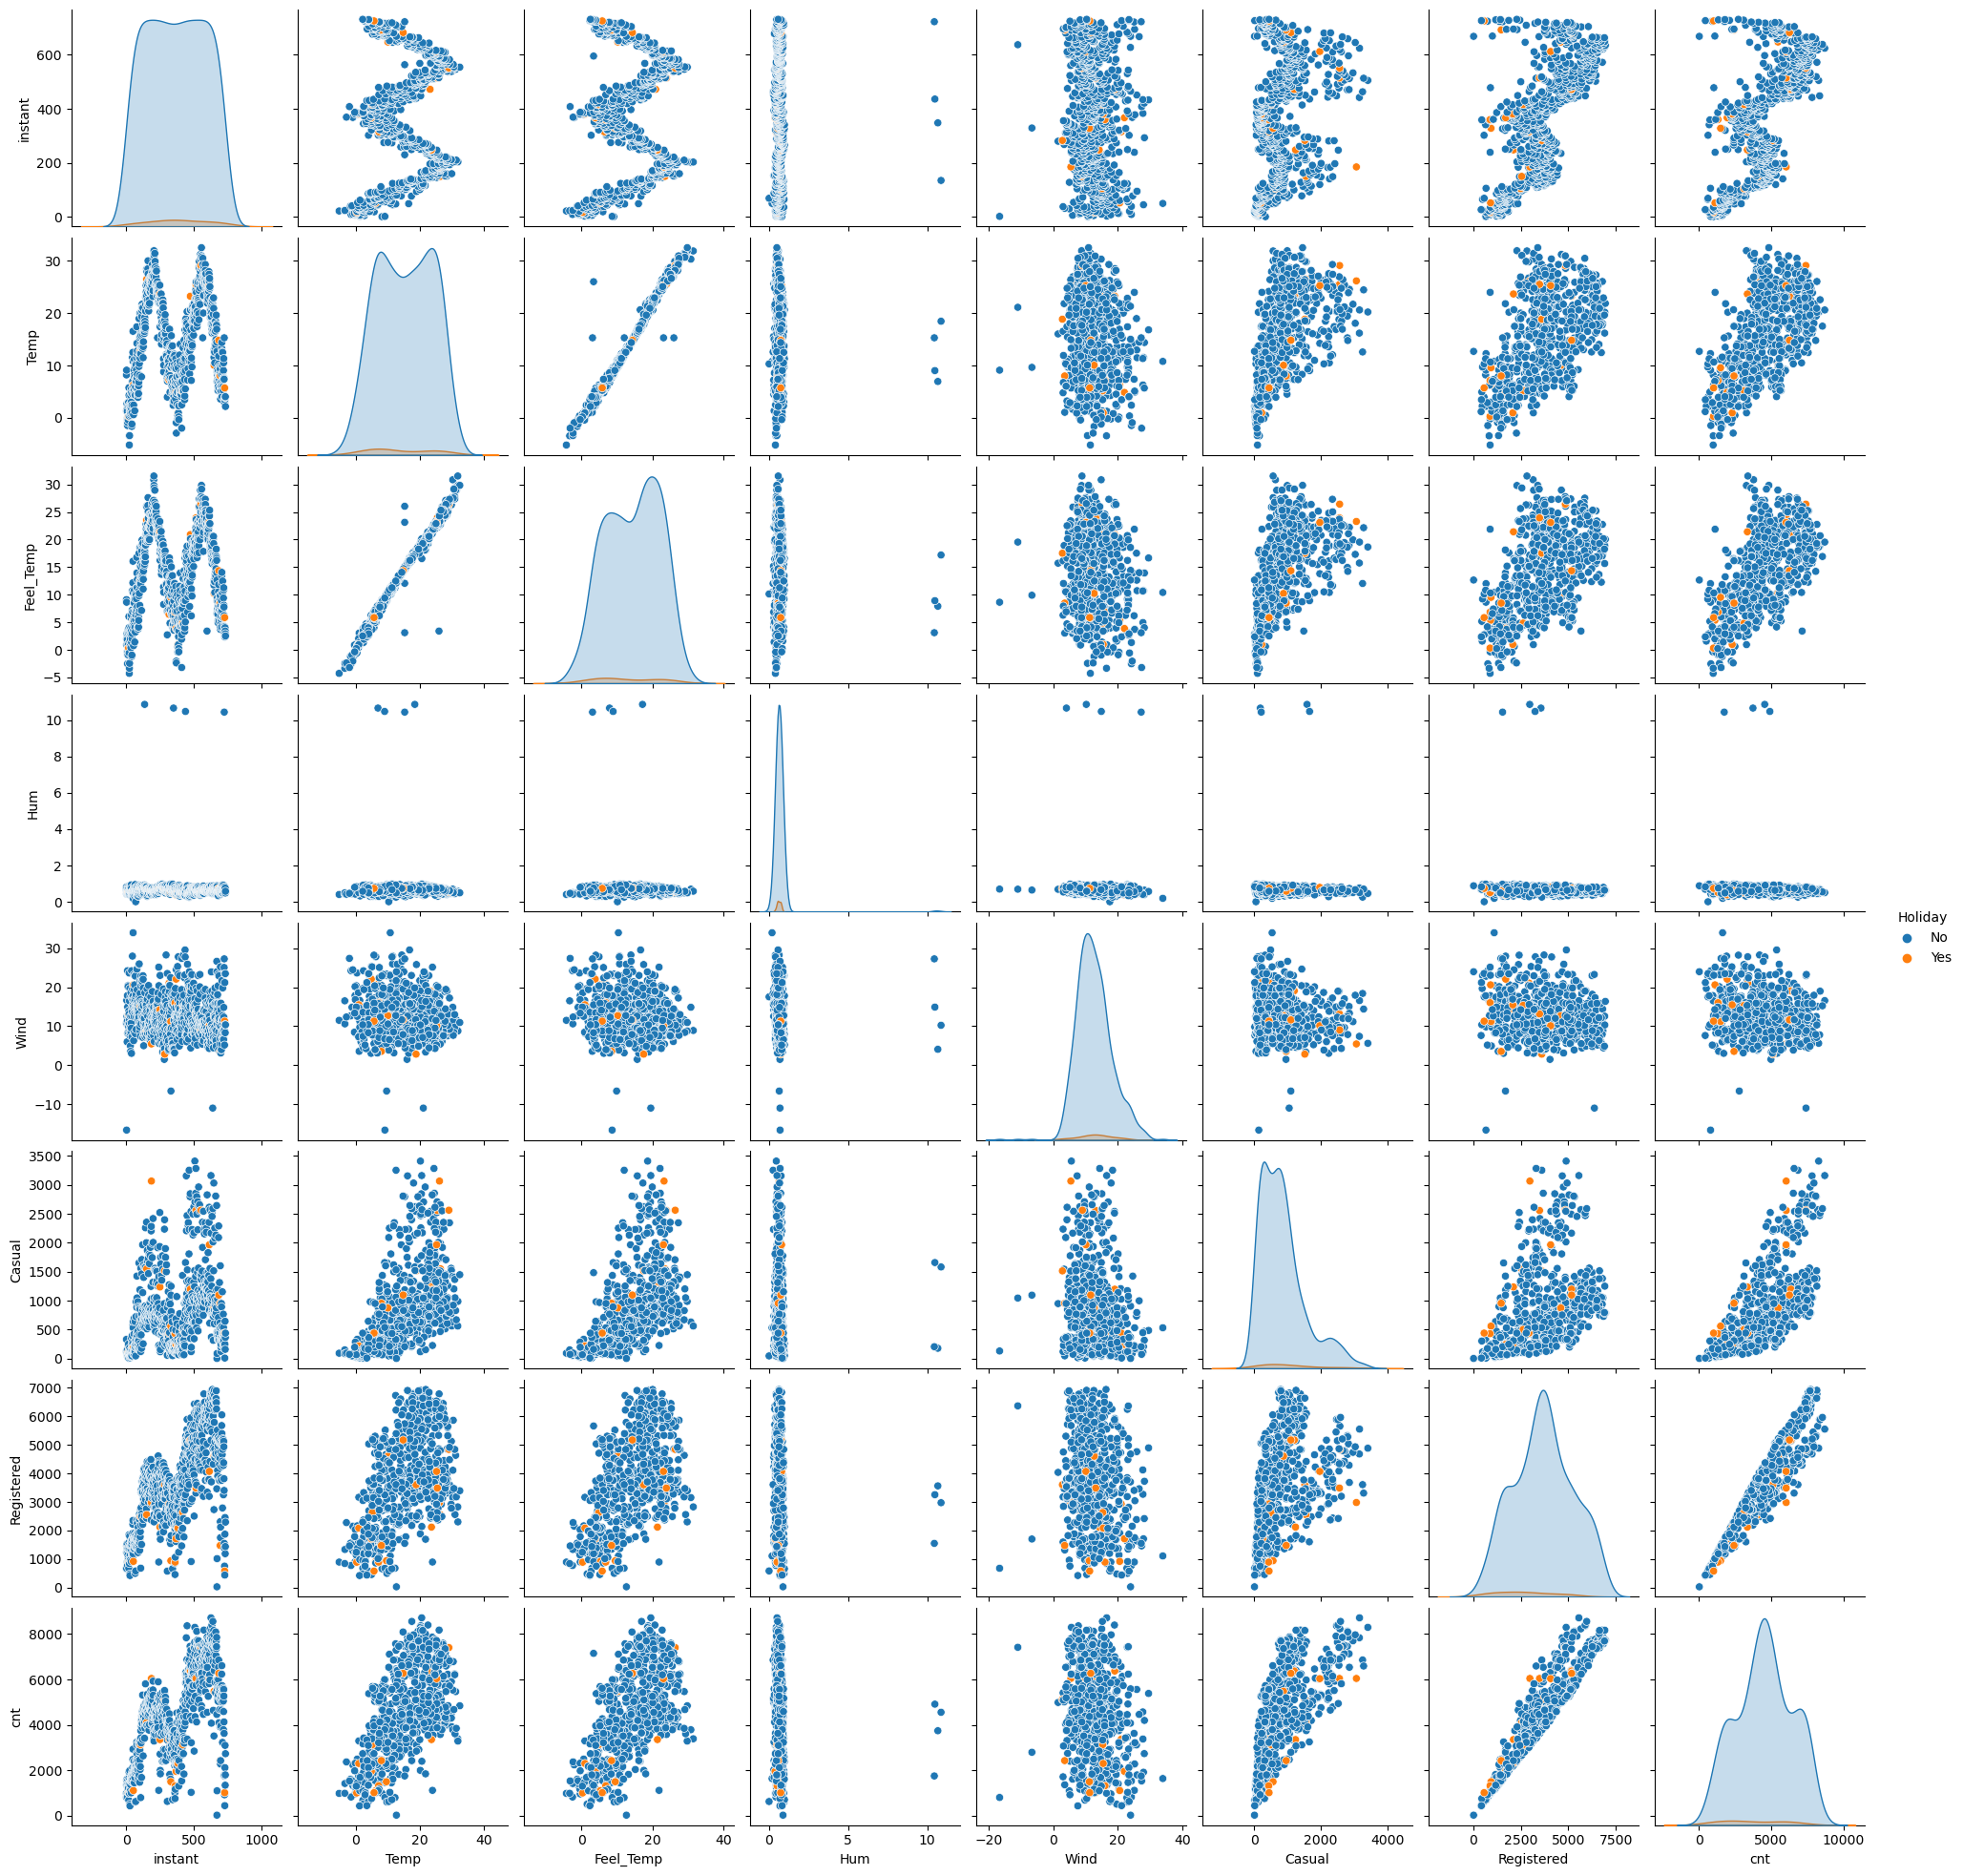

In [14]:
#Relación entre las variables númericas diferenciadas a través de la variable Holiday
sns.pairplot(data = datos,hue='Holiday')
plt.show()

## Correlación

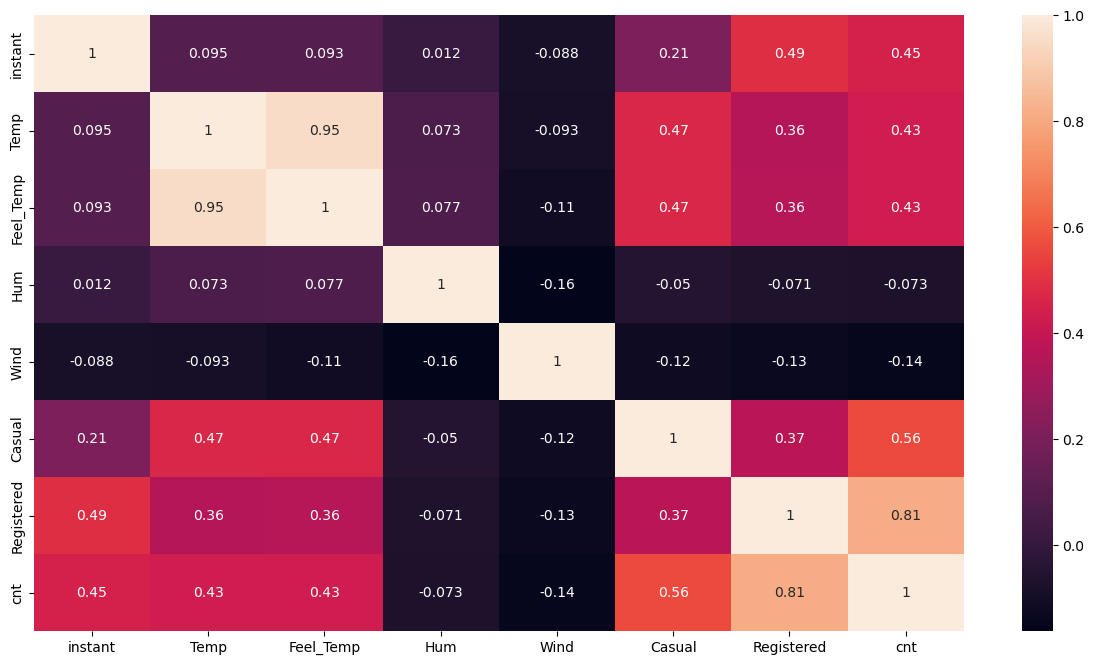

In [15]:
#El mapa de calor nos muestra que la variable de usuarios registrados y el número total de usuarios registrados que es
#nuestra variable de interés.

corr = datos.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
datos.columns

plt.show()

In [16]:
datos.drop(['Date'], axis=1, inplace=True)

In [17]:
data_num = datos.select_dtypes(include = ['float64','int64'])
corr = data_num.corr()['cnt'][:-1]
top_features = corr.sort_values(ascending=False)
print("{} correlated values : \n{}".format(len(top_features),top_features))

7 correlated values : 
Registered    0.945517
Casual        0.672804
Feel_Temp     0.631066
instant       0.628830
Temp          0.625056
Hum          -0.047965
Wind         -0.214097
Name: cnt, dtype: float64


## Desarrollo de modelos de regresión (30 pts)


Implemente al menos 3 modelos basados en el algoritmo de regresión lineal: uno simple, uno polinomial y uno con algún tipo de regularización.

## Preparación de datos

Creamos variables dummy

In [18]:
datos_1= pd.get_dummies(datos,drop_first=True)
datos_2=datos_1.dropna().copy()
datos_2

instant      Temp  Feel_Temp       Hum       Wind  Casual  Registered  \
0          1  8.175849   9.090375  0.805833  10.749882     331         654   
1          2  9.083466   8.625733  0.696087 -16.652113     131         670   
2          3  1.229108   0.902035  0.437273  16.636703     120        1229   
3          4  1.400000   1.969734  0.590435  10.739832     108        1454   
4          5  2.666979   2.775690  0.436957  12.522300      82        1518   
..       ...       ...        ...       ...        ...     ...         ...   
726      727  3.945849   2.652174  0.652917  23.458911     247        1867   
727      728  3.906651   3.987162  0.590000  10.416557     644        2451   
728      729  3.906651   3.392800  0.752917   8.333661     159        1182   
729      730  4.024151   2.889900  0.483333  23.500518     364        1432   
730      731  2.144151   2.503889  0.577500  10.374682     439        2290   

      cnt  Season_Springer  Season_Summer  ...  Weather_ Partly cloudy  \
0     985                1              0  ...                       0   
1     801                1              0  ...                       0   
2    1349                1              0  ...                       0   
3    1562                1              0  ...                       0   
4    1600                1              0  ...                       0   
..    ...              ...            ...  ...                     ...   
726  2114                1              0  ...                       0   
727  3095                1              0  ...                       0   
728  1341                1              0  ...                       0   
729  1796                1              0  ...                       0   
730  2729                1              0  ...                       0   

     Weather_Clear  Weather_Few clouds  Weather_Light Rain + Scattered clouds  \
0                0                   0                                      0   
1                0                   0                                      0   
2                0                   1                                      0   
3                0                   1                                      0   
4                0                   0                                      0   
..             ...                 ...                                    ...   
726              0                   0                                      0   
727              0                   0                                      0   
728              0                   0                                      0   
729              0                   1                                      0   
730              0                   0                                      0   

     Weather_Mist  Weather_Mist + Broken clouds  Weather_Mist + Cloudy  \
0               0                             0                      1   
1               0                             0                      1   
2               0                             0                      0   
3               0                             0                      0   
4               0                             0                      0   
..            ...                           ...                    ...   
726             0                             0                      1   
727             0                             0                      0   
728             1                             0                      0   
729             0                             0                      0   
730             0                             0                      0   

     Weather_Mist + Few clouds  Weather_Rain + Thunderstorm  Weather_Snow  
0                            0                            0             0  
1                            0                            0             0  
2                            0                            0             0  
3            

In [19]:
# Decodificaremos los datos categoricos volviéndolos en variables dummy
datos= pd.get_dummies(datos,drop_first=True)
datos_2=datos.copy()
y_col='cnt'
X=datos_2.drop(y_col,axis=1)
y=datos_2[y_col].copy()
X.head()

instant      Temp  Feel_Temp       Hum       Wind  Casual  Registered  \
0        1  8.175849   9.090375  0.805833  10.749882     331         654   
1        2  9.083466   8.625733  0.696087 -16.652113     131         670   
2        3  1.229108   0.902035  0.437273  16.636703     120        1229   
3        4  1.400000   1.969734  0.590435  10.739832     108        1454   
4        5  2.666979   2.775690  0.436957  12.522300      82        1518   

   Season_Springer  Season_Summer  Season_Winter  ...  Weather_ Partly cloudy  \
0                1              0              0  ...                       0   
1                1              0              0  ...                       0   
2                1              0              0  ...                       0   
3                1              0              0  ...                       0   
4                1              0              0  ...                       0   

   Weather_Clear  Weather_Few clouds  Weather_Light Rain + Scattered clouds  \
0              0                   0                                      0   
1              0                   0                                      0   
2              0                   1                                      0   
3              0                   1                                      0   
4              0                   0                                      0   

   Weather_Mist  Weather_Mist + Broken clouds  Weather_Mist + Cloudy  \
0             0                             0                      1   
1             0                             0                      1   
2             0                             0                      0   
3             0                             0                      0   
4             0                             0                      0   

   Weather_Mist + Few clouds  Weather_Rain + Thunderstorm  Weather_Snow  
0                          0                            0             0  
1                          0                            0             0  
2                          0                            0             0  
3                          0                            0             0  
4                          0                            0             0  

[5 rows x 21 columns]

In [20]:
# Dividimos nuestro conjunto de datos de entrenamiento(80%) y prueba(20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Modelos

## Modelo de regresión líneal

In [21]:
linear_r=LinearRegression()
linear_r.fit(X_train,y_train)
model_y_lr=linear_r.predict(X_test)
##Coeficientes de nuestro modelos de regresión líneal
pd.DataFrame(zip(X.columns,linear_r.coef_))

0             1
0                                 instant  1.732887e-15
1                                    Temp -7.440017e-14
2                               Feel_Temp  4.391932e-14
3                                     Hum  7.754616e-14
4                                    Wind -8.006907e-15
5                                  Casual  1.000000e+00
6                              Registered  1.000000e+00
7                         Season_Springer -3.275440e-13
8                           Season_Summer -1.084035e-14
9                           Season_Winter -1.309835e-13
10                            Holiday_Yes -2.649333e-14
11                 Weather_ Partly cloudy  6.515602e-15
12                          Weather_Clear -2.201994e-14
13                     Weather_Few clouds -6.697091e-14
14  Weather_Light Rain + Scattered clouds -4.444875e-14
15                           Weather_Mist  1.573986e-14
16           Weather_Mist + Broken clouds  8.081906e-14
17                  Weather_Mist + Cloudy -2.840721e-14
18              Weather_Mist + Few clouds -1.327481e-15
19            Weather_Rain + Thunderstorm  3.132536e-13
20                           Weather_Snow -3.682993e-13

## Regresión Polinomial

In [22]:
# Entrenamos el modelo de regresión polinomial con grados 1,2 y 3
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()
y_train_poly = y_train.copy()
y_test_poly = y_test.copy()

model_score = []

for i in range(1,4):
    polyreg=make_pipeline(PolynomialFeatures(i,include_bias=True),LinearRegression())
    polyreg.fit(X_train_poly,y_train_poly)
    model_score.append(polyreg.score(X_train_poly,y_train_poly))

print(f'Score del modelo de entrenamiento: {model_score}')

Score del modelo de entrenamiento: [1.0, 1.0, 0.9999999999999999]


In [23]:
#Regresión polinomial grado 1
polyreg = make_pipeline(PolynomialFeatures(degree=1,include_bias=True),LinearRegression())
polyreg.fit(X_train_poly,y_train_poly)
y_pred_pr_1 = polyreg.predict(X_test_poly)

In [24]:
#Regresión polinomial grado 3
polyreg = make_pipeline(PolynomialFeatures(degree=3,include_bias=True),LinearRegression())
polyreg.fit(X_train_poly,y_train_poly)
y_pred_pr_3 = polyreg.predict(X_test_poly)

## Regresión Ridge(L2)

In [25]:
# Regresión Ridge con parámetro alpha igual a 1.0, recordemos que debemos estandarizar antes de ejecutar el modelo
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

RR = Ridge(alpha=1.0)
RR.fit(x_train , y_train)
y_pred_ridge_1 = RR.predict(x_test)

RR.score(x_test,y_test)

0.9999916679838738

In [26]:
# Regresión Ridge con parámetro alpha igual a 0.5

RR = Ridge(alpha=0.5)
RR.fit(x_train , y_train)
y_pred_ridge_2 = RR.predict(x_test)

RR.score(x_test,y_test)

0.9999978956296669

# Evaluación de modelos (20 pts)
Con base en el desempeño de cada uno de los modelos, concluya cuál es el modelo que se le debe presentar a la alcaldía. Justifique su respuesta.

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
def rmse(y_pred,y_test):
  return np.sqrt(mean_squared_error(y_pred,y_test))

## MSE y R2 PARA LA REGRESIÓN LÍNEAL SIMPLE

In [28]:
print('R2 score: ',r2_score(model_y_lr,y_test))
print('RMSE: ',rmse(model_y_lr,y_test))

R2 score:  1.0
RMSE:  8.425504048483722e-13


## MSE Y R2 PARA LA REGRESIÓN POLINOMIAL GRADO 3

In [29]:
print('R2 score: ',r2_score(y_pred_pr_3,y_test))
print('RMSE: ',rmse(y_pred_pr_3,y_test))

R2 score:  0.9999999999938171
RMSE:  0.005128033317514637


## MSE Y R2 PARA LA REGRESIÓN RIDGE ALPHA=0.5

In [30]:
print('R2 score: ',r2_score(y_pred_ridge_1,y_test))
print('RMSE: ',rmse(y_pred_ridge_2,y_test))

R2 score:  0.9999916433217131
RMSE:  2.9916864113257957


Aparentemente los 3 modelos realizados predicen bien, sin embargo el RMSE nos indica que el modelo que se realizó para predecir valores a través de la regresión Ridge tiene un error de precisión más alto que los demás.

El modelos de regresión simple, parece el más indicado para presentar a la alcaldía, puesto que nos indica un alto nivel de precisión(Casi perfecto) y un error de precisión demasiado bajo, con respecto a los demás modelos calculados.
Sin emabrgo el modelo polinomico de grado 3 también parece un buen modelo y ambos pueden ser presentados a la alcaldía.

## Interpretación (10 pts)

El día de la presentación de resultados, una persona de la alcaldía le hace las siguientes preguntas:

● ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de usuarios?

Casual, registeres y Weather_Rain + Thunderstorm

● Describa cual es el escenario ideal para el incremento de usuarios.

La mejor situación para el incremento de usuarios, es que el clima sea totalmente favorable a los usuarios, en especial que no hayan tormentas, lluvia y neblina.

● ¿Qué pasos adicionales deberían tener en cuenta para una próxima iteración/mejora del modelo?

Aumentar los registros y experiencias de los usuarios con el servicio es fundamental para obtener buenas predicciones. El conjunto de datos debería ser mayor para poder obtener muestras representativas de nuestro grupo objetivo haciendo recolección de variables demgráficos que permitan tener un panorama y conocimiento mayor de los clientes.